## MO444 Project 3 - Reinforcement Learning

* Rodrigo Araújo Marinho Franco - RA: 233569
* Felipe Marinho Tavares - RA: 265680

### Contributions:
* Rodrigo
 * ...
* Felipe
 * ...

# PART I - Evolutionary Model

# PART II - Reinforcement Learning

In [1]:
from util import *
import numpy as np
import matplotlib.pyplot as plt

import pacman as pm
import layout as l
import textDisplay
import pacmanAgents, ghostAgents

try:
    import boinc
    _BOINC_ENABLED = True
except:
    _BOINC_ENABLED = False

In [6]:
class Environment:
    def __init__(self, layout="mediumClassic"):
        self.layout = l.getLayout(layout)
        self.beQuiet=True
        self.catchExceptions = False
        self.rules = pm.ClassicGameRules(timeout=30)
        self.reset()
        self.reward = 0 # Score by doing last action
        self.total_reward = 0 # Total reward

    def reset(self):
        self.display = textDisplay.NullGraphics()
        self.pacman = pacmanAgents.GreedyAgent()
        self.ghosts = [ghostAgents.RandomGhost(i+1) for i in range(self.layout.getNumGhosts())]
        self.agents = [self.pacman] + self.ghosts
        self.game = self.rules.newGame(self.layout, self.pacman, self.ghosts,
                                       self.display, self.beQuiet, self.catchExceptions)

        # inform learning agents of the game start
        for i in range(len(self.agents)):
            agent = self.game.agents[i]
            if not agent:
                self.game.mute(i)
                # this is a null agent, meaning it failed to load
                # the other team wins
                print("Agent %d failed to load" % i, file=sys.stderr)
                self.game.unmute()
                self.game._agentCrash(i, quiet=True)
                return

        self.agentIndex = self.game.startingIndex
        self.numAgents = len(self.game.agents)

    def get_current_state(self):
        return self.game.state.deepCopy()

    def get_reward(self):
        return env.game.state.getScore()

    def update_game_state(self, action):
        # Execute the action
        self.game.state = self.game.state.generateSuccessor( self.agentIndex, action )
        # Change the display
        self.game.display.update( self.game.state.data )
        # Allow for game specific conditions (winning, losing, etc.)
        self.game.rules.process(self.game.state, self.game)
        # Track progress
        if self.agentIndex == self.numAgents + 1: self.game.numMoves += 1
        # Next agent
        self.agentIndex = ( self.agentIndex + 1 ) % self.numAgents

        if _BOINC_ENABLED:
            boinc.set_fraction_done(self.game.getProgress())

    def convert_state_to_image(self, state):
        state = str(state).split("\n")[:-2]
        new_state = np.zeros((self.layout.height, self.layout.width))
        state_dict = {
            '%': 0, '.': 225, 'o': 255,
            'G': 50, '<': 75, '>': 75,
            '^': 75, 'v': 75, ' ': 150,
        }

        for i in range(self.layout.height):
            for j in range(self.layout.width):
                new_state[i][j] = state_dict[state[i][j]]

        return new_state

    def step(self):
        initial_reward = self.get_reward()

        for agentIndex, agent in enumerate(self.game.agents):
            if not self.done():
                observation = self.get_current_state()
                action_ghost = agent.getAction(observation)
                print(action_ghost)
                if agentIndex == 0:
                    current_reward = self.get_reward()
                    reward_by_action = current_reward - initial_reward
                    #agent.step(reward_by_action)
                self.update_game_state(action_ghost)

    def done(self, fast_check=False):
        if not self.game.gameOver:
            return False
        else:
            if fast_check: self.game.display.finish()
            return True

In [7]:
env = Environment()

In [8]:
n_episodes = 1
for i_episode in range(1, n_episodes + 1):
    print("Episode: ", i_episode)

    env.reset()

    while not env.done():
        env.step()

    scores = [env.game.state.getScore()]
    wins = [env.game.state.isWin()]
    winRate = wins.count(True)/ float(len(wins))
    print('Average Score:', sum(scores) / float(len(scores)))
    print('Scores:       ', ', '.join([str(score) for score in scores]))
    print('Win Rate:      %d/%d (%.2f)' % (wins.count(True), len(wins), winRate))
    print('Record:       ', ', '.join([ ['Loss', 'Win'][int(w)] for w in wins]))

    print()

Episode:  1
West
East
West
West
East
West
West
North
North
North
North
North
North
West
East
East
West
South
East
West
South
East
West
East
East
South
West
East
South
West
East
South
West
East
South
East
North
West
East
North
West
North
East
South
North
East
South
West
East
West
West
East
West
West
East
West
West
North
North
West
North
North
West
North
North
North
North
North
North
West
East
West
West
East
West
West
East
West
South
East
South
South
East
South
East
South
South
South
South
South
South
East
East
South
East
East
South
East
North
West
East
North
West
East
East
West
East
North
South
East
North
South
East
West
West
East
West
West
East
West
West
North
South
East
North
South
West
North
South
West
North
South
West
West
South
East
West
South
East
West
South
East
North
South
East
North
East
East
West
East
West
West
East
West
West
North
West
West
North
East
West
West
West
West
North
East
West
North
East
South
East
West
South
East
East
East
East
East
East
North
North
East
North
Sout

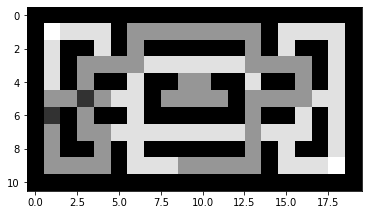

In [5]:
state = env.get_current_state()
new_state = env.convert_state_to_image(state)

plt.imshow(new_state, cmap="gray", vmin=0, vmax=255)
plt.show()